In [99]:
import ete3
import random
import pymc3 as pm
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import shutil
import pandas as pd
from scipy.spatial.distance import squareform
from scipy.stats import pearsonr
import os
import subprocess
from itertools import product, combinations
import community
from sklearn.linear_model import HuberRegressor as hr, LinearRegression as lr, BayesianRidge as br
import statsmodels.api as sm
import glob

In [54]:
gcf_sum = {}
for line in open('concord.cf.stat_tree').readlines()[1:]:
    line = line.split('\t')
    gcf_sum[line[0]] ={}

In [55]:



for line in open('concord.cf.stat_tree').readlines()[1:]:
    line = line.split('\t')
    branch_data = {}
    if not'NA' in line: 
        
        branch_data[line[1]] =[float(line[2]), float(line[3]), float(line[4])]
        gcf_sum[line[0]].update(branch_data)

In [76]:
fam_labels = gcf_sum['111'].keys()
fam_distro = {}
for label in fam_labels:
    fam_distro[label] = 0
fam_distro



{'1': 0,
 '2': 0,
 '3': 0,
 '4': 0,
 '5': 0,
 '6': 0,
 '7': 0,
 '8': 0,
 '9': 0,
 '10': 0,
 '11': 0,
 '12': 0,
 '13': 0,
 '14': 0,
 '15': 0,
 '16': 0,
 '17': 0,
 '18': 0,
 '19': 0,
 '20': 0,
 '21': 0,
 '22': 0,
 '23': 0,
 '24': 0,
 '25': 0,
 '26': 0,
 '27': 0,
 '28': 0,
 '29': 0,
 '30': 0,
 '31': 0,
 '32': 0,
 '33': 0,
 '34': 0,
 '35': 0,
 '36': 0,
 '37': 0,
 '38': 0,
 '39': 0,
 '40': 0,
 '41': 0,
 '42': 0,
 '43': 0,
 '44': 0,
 '45': 0,
 '46': 0,
 '47': 0,
 '48': 0,
 '49': 0,
 '50': 0,
 '51': 0,
 '52': 0,
 '53': 0,
 '54': 0,
 '55': 0,
 '56': 0,
 '57': 0,
 '58': 0,
 '59': 0,
 '60': 0,
 '61': 0,
 '62': 0,
 '63': 0,
 '64': 0,
 '65': 0,
 '66': 0,
 '67': 0,
 '68': 0,
 '69': 0,
 '70': 0,
 '71': 0,
 '72': 0,
 '73': 0,
 '74': 0,
 '75': 0,
 '76': 0,
 '77': 0,
 '78': 0,
 '79': 0,
 '80': 0,
 '81': 0,
 '82': 0,
 '83': 0,
 '84': 0,
 '85': 0,
 '86': 0,
 '87': 0,
 '88': 0,
 '89': 0,
 '90': 0,
 '91': 0,
 '92': 0,
 '93': 0,
 '94': 0,
 '95': 0,
 '96': 0,
 '97': 0,
 '98': 0,
 '99': 0,
 '100': 0,
 '101': 

In [78]:
for branch in gcf_sum.keys():
    for fam in fam_labels:
       if fam in gcf_sum[branch].keys():
            if gcf_sum[branch][fam][0] == 1:
                fam_distro[fam] += 1

In [87]:
fam_distro

{'1': 32,
 '2': 45,
 '3': 47,
 '4': 36,
 '5': 47,
 '6': 47,
 '7': 52,
 '8': 43,
 '9': 44,
 '10': 39,
 '11': 51,
 '12': 52,
 '13': 64,
 '14': 45,
 '15': 65,
 '16': 38,
 '17': 53,
 '18': 39,
 '19': 52,
 '20': 57,
 '21': 57,
 '22': 55,
 '23': 55,
 '24': 53,
 '25': 41,
 '26': 61,
 '27': 39,
 '28': 50,
 '29': 24,
 '30': 63,
 '31': 45,
 '32': 61,
 '33': 42,
 '34': 56,
 '35': 54,
 '36': 44,
 '37': 53,
 '38': 35,
 '39': 40,
 '40': 57,
 '41': 64,
 '42': 44,
 '43': 51,
 '44': 34,
 '45': 60,
 '46': 49,
 '47': 56,
 '48': 72,
 '49': 52,
 '50': 40,
 '51': 56,
 '52': 44,
 '53': 59,
 '54': 54,
 '55': 36,
 '56': 49,
 '57': 41,
 '58': 37,
 '59': 46,
 '60': 30,
 '61': 35,
 '62': 51,
 '63': 45,
 '64': 42,
 '65': 57,
 '66': 50,
 '67': 48,
 '68': 49,
 '69': 22,
 '70': 54,
 '71': 64,
 '72': 51,
 '73': 65,
 '74': 43,
 '75': 49,
 '76': 24,
 '77': 50,
 '78': 47,
 '79': 63,
 '80': 50,
 '81': 60,
 '82': 55,
 '83': 36,
 '84': 48,
 '85': 51,
 '86': 57,
 '87': 49,
 '88': 51,
 '89': 49,
 '90': 52,
 '91': 53,
 '92': 4

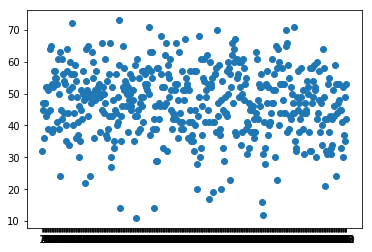

In [93]:
hist_y = fam_distro.values()
hist_x = fam_distro.keys()

plt.scatter(hist_x, hist_y)


In [286]:
low_gcf =[]
for index,row in fam_distro.items():
    if row < 32:
        low_gcf.append(index)

In [305]:
family_names = []
for line in open('treelist.txt').readlines():
    
    family_names.append(line[:-1])
    
family_names

['3074_chromosome_partition',
 '3083_Photosystem_II_react',
 '3084_hypothetical_protein',
 '3085_hypothetical_protein',
 '3089_hypothetical_protein',
 '3093_hypothetical_protein',
 '3111_rod_shape-determinin',
 '3122_aspartate_aminotrans',
 '3133_preprotein_transloca',
 '3135_cytochrome_b6-f_comp',
 '3136_apocytochrome_f',
 '3137_diacylglyceryl_trans',
 '3142_hypothetical_protein',
 '3144_alkaline_phosphatase',
 '3146_magnesium_chelatase',
 '3157_hypothetical_protein',
 '3159_tRNA_modification_GT',
 '3164_alanine_dehydrogenas',
 '3166_triosephosphate_isom',
 '3175_hypothetical_protein',
 '3181_adenylosuccinate_syn',
 '3186_signal_recognition_p',
 '3188_pyruvate_dehydrogena',
 '3190_aspartate_carbamoylt',
 '3195_glutamyl-tRNA_amidot',
 '3199_isoleucyl-tRNA_synth',
 '3200_imidazoleglycerol-ph',
 '3202_chemotaxis_protein_C',
 '3205_isocitrate_dehydroge',
 '3211_hypothetical_protein',
 '3212_chorismate-binding_p',
 '3215_2-phosphosulfolactat',
 '3216_hypothetical_protein',
 '3220_pseudouri

In [313]:
for f in low_gcf:
    #print(fam_distro[f])
    print(family_names[(int(f)-1)], file=open('discordant_genes.txt', 'a'))

In [109]:
import statistics



print('Mean: ' + str(statistics.mean(hist_y)) + "\nMedian: " + str(statistics.median(hist_y)) + "\nStdDev: " + str(statistics.stdev(hist_y))
     )
statistics.

Mean: 47.28690228690229
Median: 48
StdDev: 10.649961608343114


In [113]:
full_stat = pd.read_csv('concord.cf.stat', comment="#", sep='\t')
full_stat

,ID,gCF,gDF1,gDF2,gN,sCF,sDF1,sDF2,sN,Label,Length
0,95,99.13,0.22,0.22,462,90.05,4.62,5.34,8270.42,100,0.359859
1,96,64.36,15.12,6.91,463,46.64,30.24,23.12,6457.74,100,0.099701
2,97,52.32,4.64,4.01,474,42.66,34.35,22.99,6699.04,100,0.112905
3,98,25.48,13.06,17.99,467,27.29,25.12,47.59,6167.58,100,0.043964
4,99,54.57,2.39,2.83,460,37.49,19.24,43.26,6323.31,100,0.108755
5,100,44.12,9.98,20.40,451,28.52,17.19,54.29,6415.70,100,0.089330
6,101,73.29,1.60,9.59,438,39.12,18.88,41.99,6656.48,100,0.202836
7,102,99.31,0.46,0.23,437,96.62,2.08,1.30,10441.09,100,0.586561
8,103,38.27,8.46,4.23,473,60.09,20.89,19.02,6071.72,100,0.058941
9,104,38.33,21.63,11.35,467,38.65,33.50,27.86,4768.29,100,0.043863


/home/tian/anaconda3/lib/python3.6/site-packages/matplotlib/text.py:2096: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  warnings.warn("You have used the `textcoords` kwarg, but not "
/home/tian/anaconda3/lib/python3.6/site-packages/matplotlib/text.py:2096: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  warnings.warn("You have used the `textcoords` kwarg, but not "
/home/tian/anaconda3/lib/python3.6/site-packages/matplotlib/text.py:2096: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  warnings.warn("You have used the `textcoords` kwarg, but not "
/home/tian/anaconda3/lib/python3.6/site-packages/matplotlib/text.py:2096: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  warnings.warn("You have used the `textc

<Figure size 3000x2500 with 0 Axes>

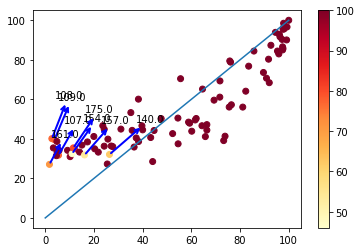

<Figure size 3000x2500 with 0 Axes>

In [151]:
plt.scatter(full_stat['gCF'],full_stat['sCF'], c=full_stat['Label'], cmap='YlOrRd')
arrowprops=dict(arrowstyle='<-', color='blue', linewidth=2)
for index, row in full_stat.iterrows():
    if row['Label'] < 90:
        plt.annotate(row['ID'], (row['gCF'], row['sCF']), textcoords='offset points', arrowprops=arrowprops)
plt.plot([0,100],[0,100])
plt.colorbar()
plt.figure(dpi=100, figsize=(30,25))
